In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression

C:\Users\loren\anaconda3\lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


(35.0, 50.0)

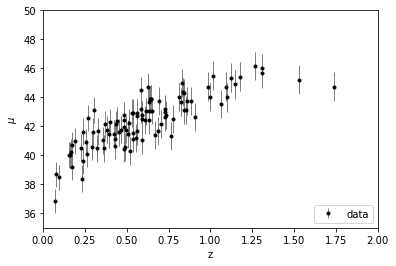

In [2]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

Linear regression

In [3]:
# reshape
z_sample_r = z_sample[:, np.newaxis]
mu_sample_r = mu_sample[:, np.newaxis]

In [4]:
z = np.linspace(0.01, 2, 1000)

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(z_sample_r, mu_sample_r, sample_weight=1.0)

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print(theta0, theta1)
X_new = np.array([[0], [2]])
y_pred_lin = lin_reg.predict(X_new)

[39.56505555] [[4.64711848]]


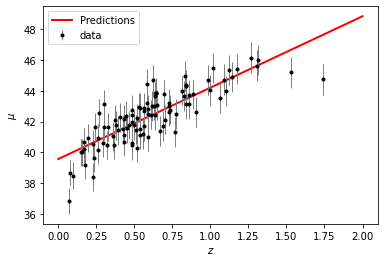

Here we are under-fitting the data


In [6]:
plt.plot(X_new, y_pred_lin, "-r", linewidth=2, label="Predictions")
#plt.fill_between(X_new, y_pred_lin - err_lin, y_pred_lin + err_lin, color='red', alpha=0.3)
#plt.plot(X_grid, y_true, "k-.", label="Actual") # Comment this out to see that it agrees with the above
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("$z$")
plt.ylabel("$\mu$")
plt.legend(loc="upper left")
plt.show()

print('Here we are under-fitting the data')

In [7]:
degree = 3
model = PolynomialRegression(degree) # fit 3rd degree polynomial
model.fit(z_sample_r, mu_sample)

y_pred_pol = model.predict(z[:, np.newaxis])
n_constraints = degree + 1

print(model.coef_)

[38.49130243  8.23905057 -2.20391808 -0.15168104]


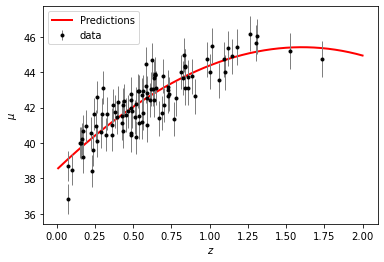

In [8]:
plt.plot(z, y_pred_pol, "-r", linewidth=2, label="Predictions")
#plt.plot(X_grid, y_true, "k-.", label="Actual") # Comment this out to see that it agrees with the above
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("$z$")
plt.ylabel("$\mu$")
plt.legend(loc="upper left")
plt.show()

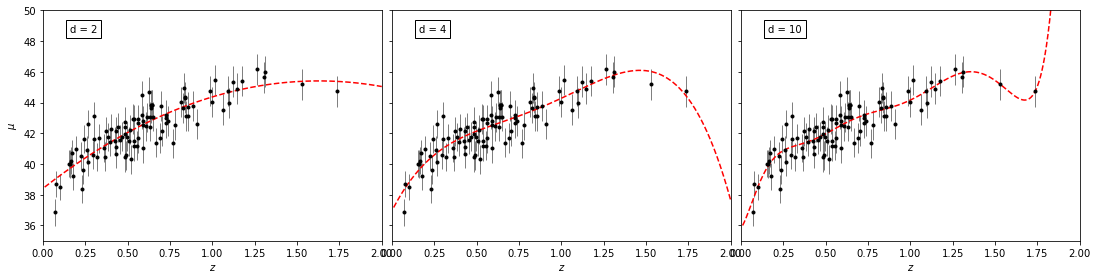

Maybe the right degree for our fit is around 2 or 3
For a degree bigger than 4 we may over-fit the data


In [9]:
fig = plt.figure(figsize=(16, 4))
fig.subplots_adjust(wspace=0.03, bottom=0.15,
                    top=0.95, left=0.07, right=0.97)

for i, d in enumerate([2, 4, 10]):  #Try 2nd, 3rd and 19th order
    ax = fig.add_subplot(131 + i)
    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

    model = PolynomialRegression(d)
    model.fit(z_sample_r, mu_sample, dmu)
    y_fit_poly = model.predict(z[:, np.newaxis])

    ax.plot(z, y_fit_poly, '--r')
    #ax.set_ylim(-0.1, 2.1)
    #ax.set_xlim(-0.2, 3.2)
    if i in (1, 2):
        ax.yaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_ylabel('$\mu$')
    ax.set_xlabel('$z$')
    ax.text(0.08, 0.94, "d = %i" % d, transform=ax.transAxes,
            ha='left', va='top',
            bbox=dict(ec='k', fc='w'))
    
    ax.set_xlim(0,2)
    ax.set_ylim(35,50)

plt.show()

print('Maybe the right degree for our fit is around 2 or 3')
print('For a degree bigger than 4 we may over-fit the data')

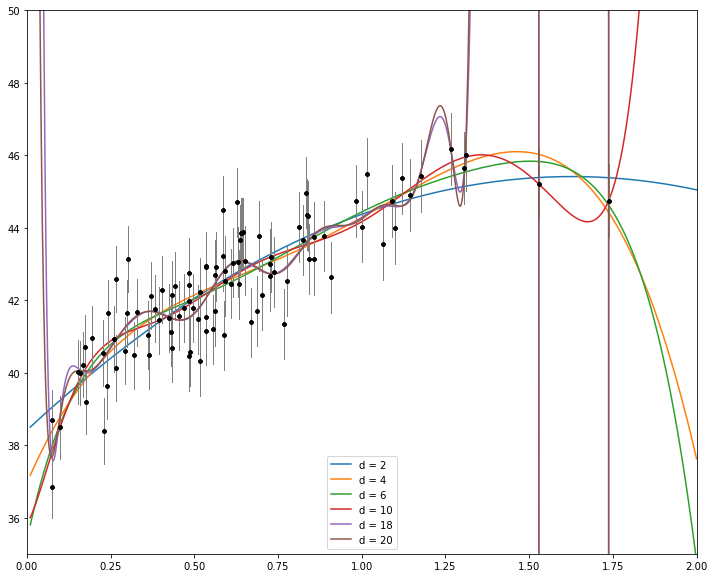

In [10]:
fig = plt.figure(figsize=(12, 10))

degrees = [2, 4, 6, 10, 18, 20]

for i, d in enumerate(degrees):  #Try 2nd, 3rd and 19th order
     
    plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

    model = PolynomialRegression(d)
    model.fit(z_sample_r, mu_sample, dmu)
    y_fit_poly = model.predict(z[:, np.newaxis])

    plt.plot(z, y_fit_poly, '-', label='d = %i' % d)
    plt.xlim(0,2)
    plt.ylim(35,50)
    plt.legend(loc = 'best') # mettilo in alto a sinistra ma non troppo
    
plt.show()

Basis function regression

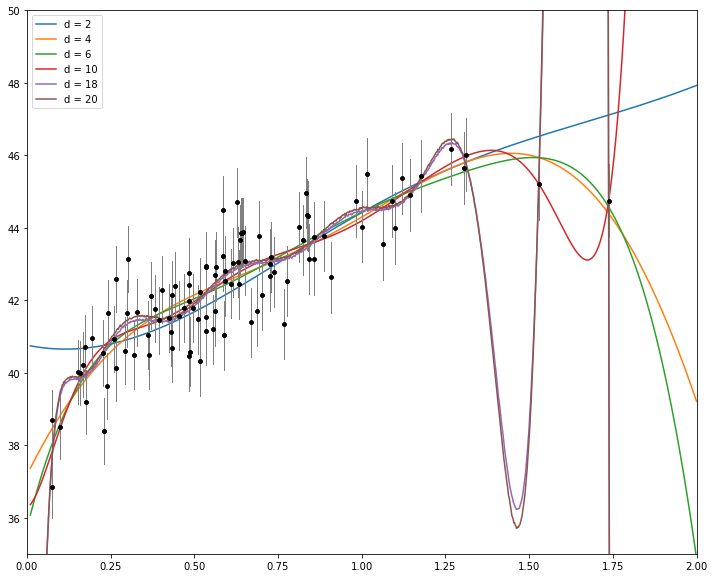

In [11]:
from astroML.linear_model import BasisFunctionRegression

fig = plt.figure(figsize=(12, 10))

degrees = [2, 4, 6, 10, 18, 20]

for i, d in enumerate(degrees):  #Try 2nd, 3rd and 19th order
     
    plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
    
    X_gridtest = np.linspace(0,2,d)[:, np.newaxis]
    sigma_test = 0.9
    model = BasisFunctionRegression('gaussian', mu=X_gridtest, sigma=sigma_test)
    model.fit(z_sample_r, mu_sample, dmu)
    y_fit_basis = model.predict(z[:, np.newaxis])

    plt.plot(z, y_fit_basis, '-', label='d = %i' % d)
    plt.xlim(0,2)
    plt.ylim(35,50)
    plt.legend(loc = 'best') # mettilo in alto a sinistra ma non troppo
    
plt.show()

Kernel Regression

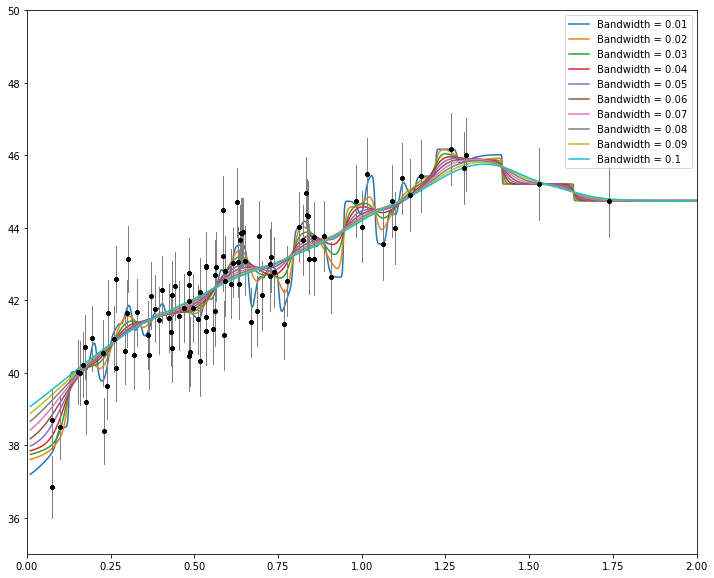

In [12]:
from astroML.linear_model import NadarayaWatson

fig = plt.figure(figsize=(12, 10))

band = np.round(np.linspace(0.01, 0.1, 10), 2)

for i, b in enumerate(band):  
     
    plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
    
    model = NadarayaWatson('gaussian', b)
    model.fit(z_sample_r, mu_sample)
    y_fit_kernel = model.predict(z[:, np.newaxis])

    plt.plot(z, y_fit_kernel, '-', label='Bandwidth = ' + str(b))
    plt.xlim(0,2)
    plt.ylim(35,50)
    plt.legend(loc = 'best') 
    
plt.show()

Training and validation

In [37]:
from sklearn.model_selection import train_test_split

mu = np.array([mu_sample, dmu]).T

z_train, z_val, mudmu_train, mudmu_val = train_test_split(z_sample_r, mu, test_size=0.3, random_state=42)
mu_train, dmu_train = mudmu_train.T
mu_val, dmu_val = mudmu_val.T

In [38]:
def geterror(X, y, classifier):
    
    return np.sqrt( np.sum(( y - classifier.predict(X) )**2) / len(X) )

def fitanderror(classifier):
    
    classifier.fit(z_train, mu_train, dmu_train)
    error_train = geterror(z_train, mu_train, classifier)
    error_validation  = geterror(z_val, mu_val, classifier)
    return error_train, error_validation

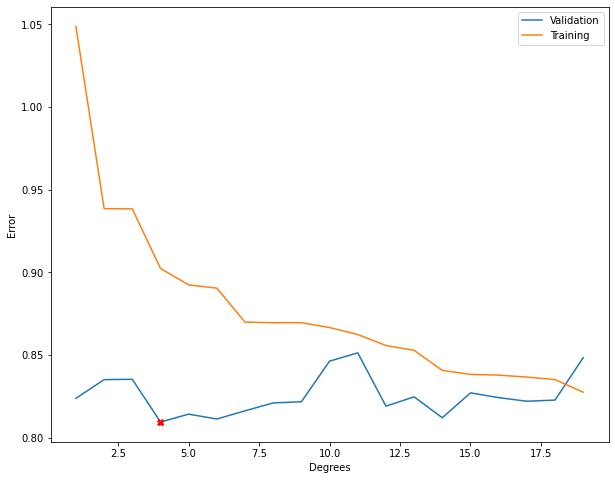

In [40]:
degrees = np.arange(1, 20)

fig = plt.figure(figsize=(10, 8))

err_train, err_test = [], []

for d in degrees:  
    
    classifier = PolynomialRegression(d)
    error_train, error_validation = fitanderror(classifier)
    #print("Kernel Regression bw=", b, error_train, error_validation)
    err_train.append(error_train)
    err_test.append(error_validation)
    
j = np.argmin(err_test)
x_min = degrees[j]
y_min = err_test[j]

plt.plot(degrees, err_test, label = 'Validation')
plt.plot(degrees, err_train, label = 'Training')
plt.plot(x_min, y_min, marker='X', c='r')

plt.xlabel('Degrees')
#plt.xlim(band[-1], band[0])
plt.ylabel('Error')
plt.legend(loc = 'best')
    
plt.show()



Learning curves

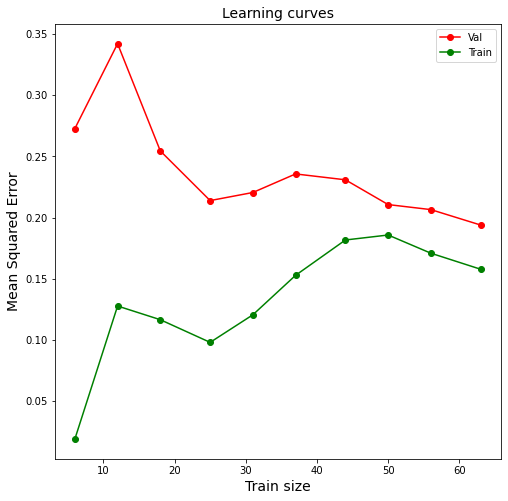

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

scaler = StandardScaler()
Xscaled = scaler.fit_transform(z_train)

# i choose d=4
d=4
p = PolynomialRegression(d)
p.fit(z_train, mu_train)
    
y = p.predict(z_train)

lin_reg = LinearRegression()
# Ten training sample sizes from 10% to 100%
train_sizes, train_scores_linreg, test_scores_linreg = \
    learning_curve(lin_reg, Xscaled, y, train_sizes=np.linspace(0.1, 1, 10), \
    scoring="neg_mean_squared_error", cv=10)

fig = plt.figure(figsize=(8, 8))

plt.plot(train_sizes, -test_scores_linreg.mean(1), 'o-', color="r", label="Val")
plt.plot(train_sizes, -train_scores_linreg.mean(1), 'o-', color="g", label="Train")
                   
plt.xlabel("Train size",fontsize=14)
plt.ylabel("Mean Squared Error",fontsize=14)
plt.title('Learning curves',fontsize=14)
plt.legend(loc="best")
#plt.ylim(0,200)

#plt.show()

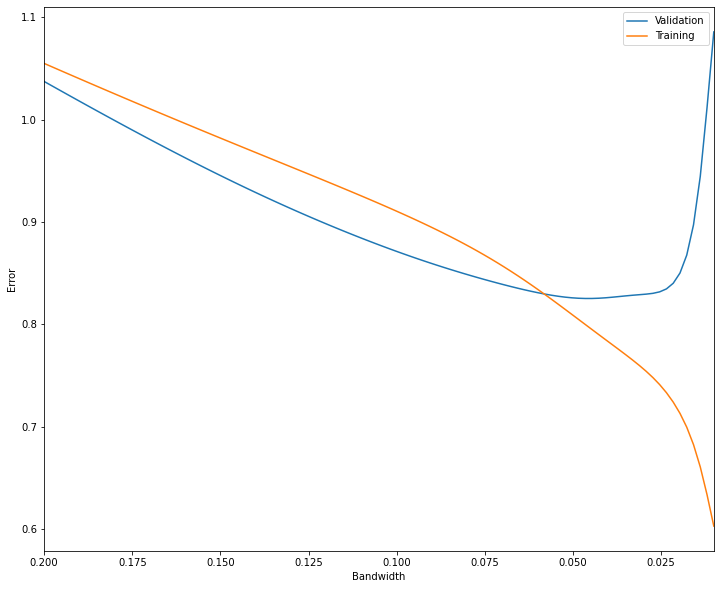

In [17]:
# you can plot error vs bandwidth
band = np.linspace(0.01, 0.2, 100)

fig = plt.figure(figsize=(12, 10))

err_train, err_test = [], []

for b in band:  
    
    classifier = NadarayaWatson('gaussian', b)
    error_train, error_validation = fitanderror(classifier)
    #print("Kernel Regression bw=", b, error_train, error_validation)
    err_train.append(error_train)
    err_test.append(error_validation)

plt.plot(band, err_test, label = 'Validation')
plt.plot(band, err_train, label = 'Training')

plt.xlabel('Bandwidth')
plt.xlim(band[-1], band[0])
plt.ylabel('Error')
plt.legend(loc = 'best')
    
plt.show()

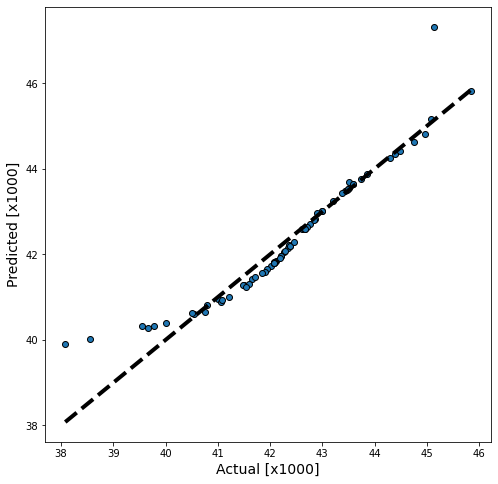

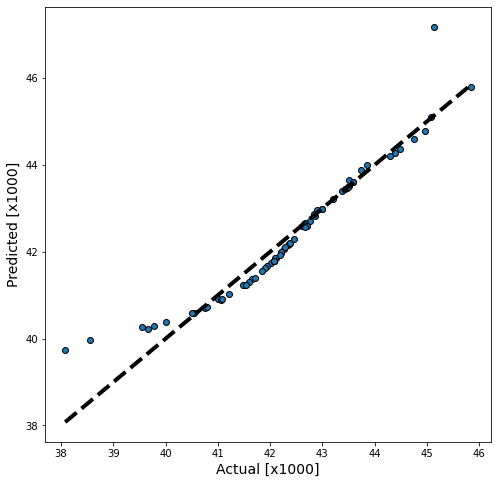

In [18]:
from sklearn.model_selection import cross_val_predict

scaler = StandardScaler()
Xscaled = scaler.fit_transform(z_train)
linreg = LinearRegression()
linreg.fit(Xscaled, y)

# Do a 10-fold cross validation
# Then try a 3-fold cross validation
# Can you understand the difference?
ypred1 = cross_val_predict(linreg, Xscaled, y, cv=10)

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y, ypred1, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual [x1000]',fontsize=14)
ax.set_ylabel('Predicted [x1000]',fontsize=14)
plt.show()

ypred2 = cross_val_predict(linreg, Xscaled, y, cv=3)

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y, ypred2, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual [x1000]',fontsize=14)
ax.set_ylabel('Predicted [x1000]',fontsize=14)
plt.show()

Maybe one can omit the last two points too see if something changes.

In [19]:
z_sample_new = np.copy(z_sample)
mu_sample_new = np.copy(mu_sample)
dmu_new = np.copy(dmu)
for i,j,k in zip(z_sample_new, mu_sample_new, dmu_new):
    if i,j,k > 1.3:
        z_sample_new.remove(i)
        mu_sample_new.remove(j)
        dmu_new.remove(k)      
    else:
        continue
    
# THINK BOUT' IT
        

SyntaxError: invalid syntax (1153320096.py, line 5)

In [ ]:
z_sample_new = z_sample[:-2]
mu_sample_new = mu_sample[:-2]
dmu_new = dmu[:-2]

plt.errorbar(z_sample_new, mu_sample_new, dmu_new, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)